# Twisted Gaussian (banana) toy LogPDF

This distribution (described [here](http://pints.readthedocs.io/en/latest/toy/twisted_gaussian_logpdf.html)) has a curved "banana" shape. The problem can be more more or less difficult by changing the "bananicity" parameter `b`.

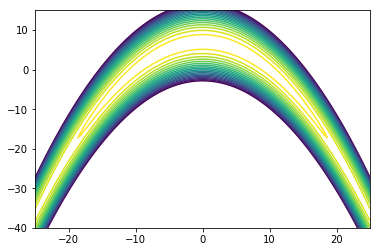

In [2]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.TwistedGaussianLogPDF(dimension=2, b=0.07)

# Contour plot of pdf
levels = np.linspace(-50, -1, 20)
x = np.linspace(-25, 25, 250)
y = np.linspace(-40, 15, 250)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]
plt.contour(X, Y, Z, levels = levels)
plt.show()

We can also sample directly from this toy LogPDF, and add that to the visualisation:

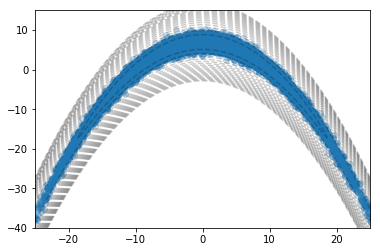

In [3]:
direct = log_pdf.sample(15000)

plt.figure()
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(direct[:, 0], direct[:, 1], alpha=0.2)
plt.xlim(-25, 25)
plt.ylim(-40, 15)
plt.show()

We now try to sample from the distribution with MCMC:

In [4]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform(-25, 25, size=(3, 2))
mcmc = pints.MCMCController(log_pdf, 3, x0, method=pints.AdaptiveCovarianceMCMC)

# Stop after 10000 iterations
mcmc.set_max_iterations(10000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[5000:] for chain in chains]

Running...
Done!


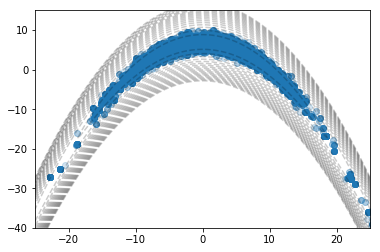

In [5]:
stacked = np.vstack(chains)
plt.figure()
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(stacked[:, 0], stacked[:, 1], alpha=0.2)
plt.xlim(-25, 25)
plt.ylim(-40, 15)
plt.show()

Now check how close the result is to the expected result, using the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback–Leibler_divergence), and compare this to the result from sampling directly.

In [6]:
print(log_pdf.kl_divergence(stacked))
print(log_pdf.kl_divergence(direct))

0.06810705191947708
5.975224405263546e-05
